# test_d23b.ipynb
Test the functions contained in d23b.py.

Author: Benjamin S. Grandey, 2023

In [1]:
! date

Fri May 12 13:49:06 +08 2023


In [2]:
import d23b
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pyvinecopulib as pv

In [3]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.13.1

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.1
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.4.2

conda environment: d23b-ice-dependence



## Combined Antarctic ISM ensemble

In [4]:
%%time
p21_l23_df = d23b.read_p21_l23_ism_data(ref_year=2015, target_year=2100)
p21_l23_df

CPU times: user 20 s, sys: 2.02 s, total: 22 s
Wall time: 23.6 s


,WAIS,EAIS,Group,Notes
0,0.029648,0.023720,P21_ISMIP6,AWI_PISM1
1,-0.022744,-0.010322,P21_ISMIP6,NCAR_CISM
2,-0.007252,0.020039,P21_ISMIP6,AWI_PISM1
3,-0.078800,-0.027450,P21_ISMIP6,NCAR_CISM
4,-0.013104,0.043617,P21_ISMIP6,AWI_PISM1
...,...,...,...,...
65,0.126400,0.303400,L23_MICI,CMIP6_BC_1850-2100 MRI-ESM2-0
66,0.084500,0.079700,L23_MICI,CMIP6_BC_1850-2100 NESM3
67,0.050000,0.044100,L23_MICI,CMIP6_BC_1850-2100 NorESM2-LM
68,0.075000,0.067500,L23_MICI,CMIP6_BC_1850-2100 NorESM2-MM


CPU times: user 293 ms, sys: 75.8 ms, total: 369 ms
Wall time: 155 ms


<pyvinecopulib.Bicop>
Gumbel, parameters = 3.03641

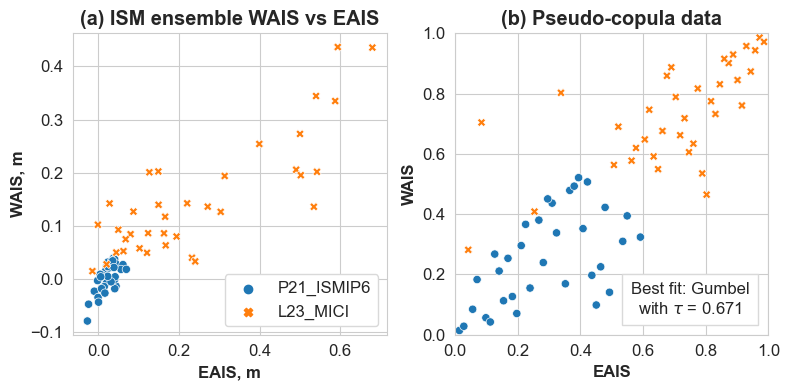

In [5]:
%%time
p21_l23_bicop, _, _ = d23b.fig_p21_l23_ism_data(ref_year=2015, target_year=2100)
p21_l23_bicop

In [6]:
# Fitted copula information
p21_l23_family = p21_l23_bicop.family
p21_l23_tau = p21_l23_bicop.tau
p21_l23_rotation = p21_l23_bicop.rotation
print(f'p21_l23_family = {p21_l23_family}')
print(f'p21_l23_tau = {p21_l23_tau}')
print(f'p21_l23_rotation = {p21_l23_rotation}')

p21_l23_family = BicopFamily.gumbel
p21_l23_tau = 0.6706641586487097
p21_l23_rotation = 0


## Marginals of ice-sheet component projections

In [7]:
%%time
qf_da = d23b.read_sea_level_qf(projection_source='fusion', component='WAIS', scenario='SSP5-8.5', year=2100)
qf_da

read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2100): including PEN in WAIS.
CPU times: user 578 ms, sys: 81.9 ms, total: 660 ms
Wall time: 750 ms


<xarray.DataArray (quantiles: 107)>
array([-5.42000055e-01, -3.78426008e-01, -2.56080016e-01, -1.98000005e-01,
       -1.48360012e-01, -1.13600003e-01, -7.89600059e-02, -5.12000032e-02,
       -2.96000015e-02, -1.48800007e-02, -5.00000035e-03, -2.00000009e-03,
        0.00000000e+00,  2.00000009e-03,  4.00000019e-03,  8.00000038e-03,
        9.00000054e-03,  1.20000010e-02,  1.40000004e-02,  1.60000008e-02,
        1.60000008e-02,  1.90000013e-02,  2.10000016e-02,  2.20000017e-02,
        2.50000022e-02,  2.60000024e-02,  2.80000009e-02,  3.00000012e-02,
        3.10000014e-02,  3.20000015e-02,  3.50000001e-02,  3.60000022e-02,
        3.70000005e-02,  3.90000008e-02,  4.10000011e-02,  4.19999994e-02,
        4.30000015e-02,  4.50000018e-02,  4.70000021e-02,  4.80000041e-02,
        4.90000024e-02,  5.10000028e-02,  5.30000031e-02,  5.40000014e-02,
        5.60000055e-02,  5.70000038e-02,  5.80000021e-02,  5.90000041e-02,
        6.10000007e-02,  6.20000027e-02,  6.30000010e-02,  6.40000030e-02,
        6.70000017e-02,  6.80000037e-02,  7.13600057e-02,  7.58800024e-02,
        7.96800043e-02,  8.36400002e-02,  8.78000021e-02,  9.31600058e-02,
        9.78600012e-02,  1.03120004e-01,  1.08160005e-01,  1.14200002e-01,
        1.19620006e-01,  1.25960009e-01,  1.32880009e-01,  1.40320002e-01,
        1.47300009e-01,  1.55880009e-01,  1.63440011e-01,  1.71560013e-01,
        1.79640010e-01,  1.88000017e-01,  1.98220014e-01,  2.06680015e-01,
        2.16300001e-01,  2.26280011e-01,  2.37000015e-01,  2.48040007e-01,
        2.59440019e-01,  2.73200020e-01,  2.85160020e-01,  2.97600016e-01,
        3.11160010e-01,  3.23000021e-01,  3.38440015e-01,  3.43108020e-01,
        3.58000021e-01,  3.75400019e-01,  3.95000000e-01,  4.22260018e-01,
        4.52480018e-01,  4.85000041e-01,  5.22000027e-01,  5.69220040e-01,
        6.24120030e-01,  6.84920014e-01,  7.65840033e-01,  8.47900023e-01,
        9.16040061e-01,  1.10008004e+00,  1.36028004e+00,  1.63016004e+00,
        1.87261006e+00,  2.02552604e+00,  2.20900011e+00])
Coordinates:
    years      int32 2100
  * quantiles  (quantiles) float64 0.0 0.001 0.005 0.01 ... 0.99 0.995 0.999 1.0
Attributes:
    units:    m

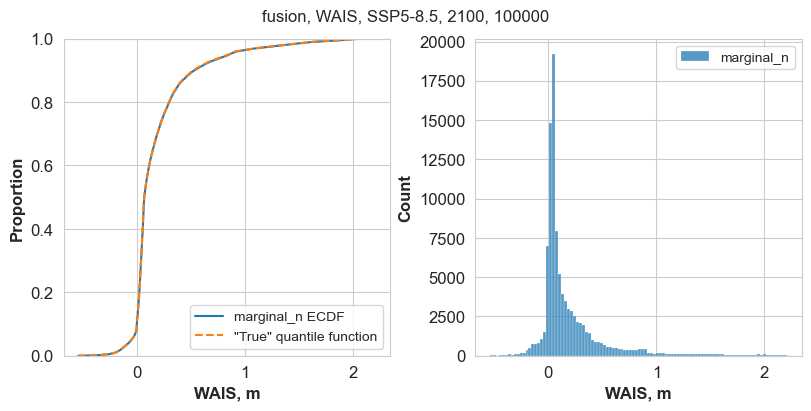

CPU times: user 2.24 s, sys: 571 ms, total: 2.81 s
Wall time: 1.12 s


array([0.02746721, 0.04167583, 0.29432265, ..., 0.03945476, 0.27346924,
       0.02800738])

In [8]:
%%time
d23b.sample_sea_level_marginal(projection_source='fusion', component='WAIS', scenario='SSP5-8.5', year=2100,
                               n_samples=int(1e5), plot=True)

CPU times: user 3.65 s, sys: 1 s, total: 4.66 s
Wall time: 1.59 s


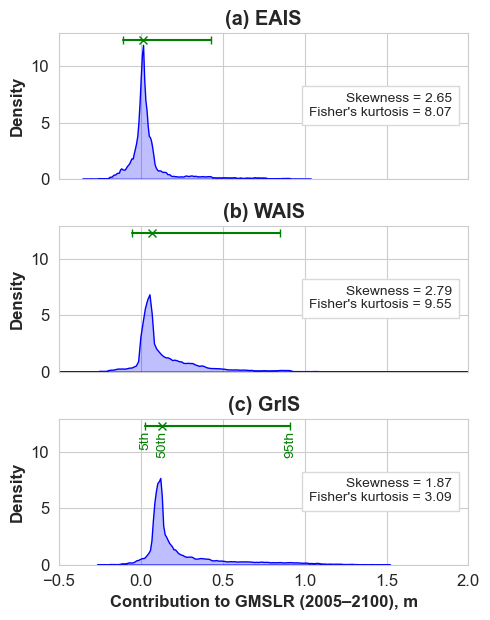

In [9]:
%%time
_ = d23b.fig_ice_sheet_marginals(projection_source='fusion', scenario='SSP5-8.5', year=2100,
                                 components=('EAIS', 'WAIS', 'GrIS'), n_samples=int(1e5))

## Sample copulas and joint distributions

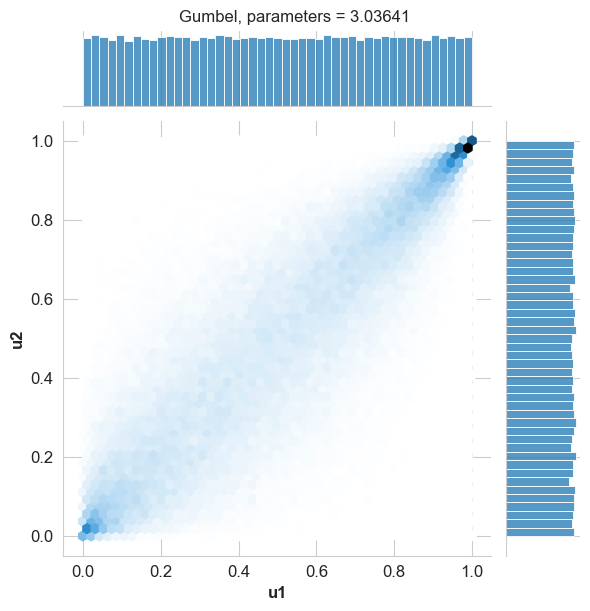

CPU times: user 1.36 s, sys: 417 ms, total: 1.78 s
Wall time: 510 ms


array([[0.58231517, 0.36444197],
       [0.13479629, 0.38117292],
       [0.64552798, 0.66662267],
       ...,
       [0.57616106, 0.25843232],
       [0.68697126, 0.66937827],
       [0.0414914 , 0.04542902]])

In [10]:
%%time
u_n2 = d23b.sample_bivariate_copula(family=p21_l23_family, rotation=p21_l23_rotation, tau=p21_l23_tau,
                                    n_samples=int(1e5), plot=True)
u_n2

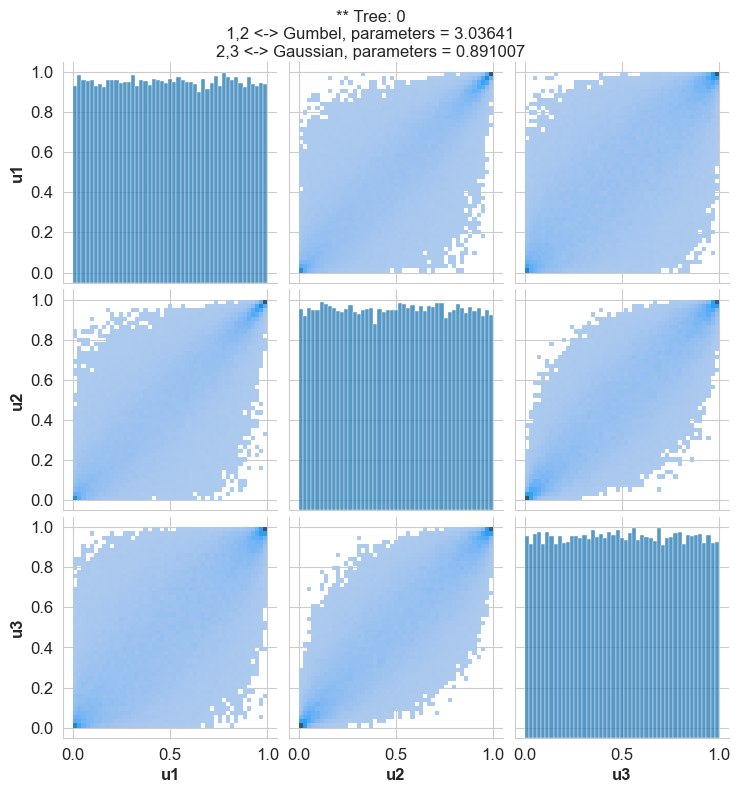

CPU times: user 3.87 s, sys: 458 ms, total: 4.32 s
Wall time: 3 s


array([[0.40376737, 0.35740726, 0.54489242],
       [0.47784054, 0.70521274, 0.51176792],
       [0.53998205, 0.48248371, 0.42088933],
       ...,
       [0.11332882, 0.0500878 , 0.13960427],
       [0.86704862, 0.85003644, 0.8717854 ],
       [0.04345687, 0.20895413, 0.25931458]])

In [11]:
%%time
u_n3 = d23b.sample_dvine_copula(families=(p21_l23_family, pv.BicopFamily.gaussian), rotations=(p21_l23_rotation, 0),
                                taus=(p21_l23_tau, 0.7), n_samples=int(1e5), plot=True)
u_n3

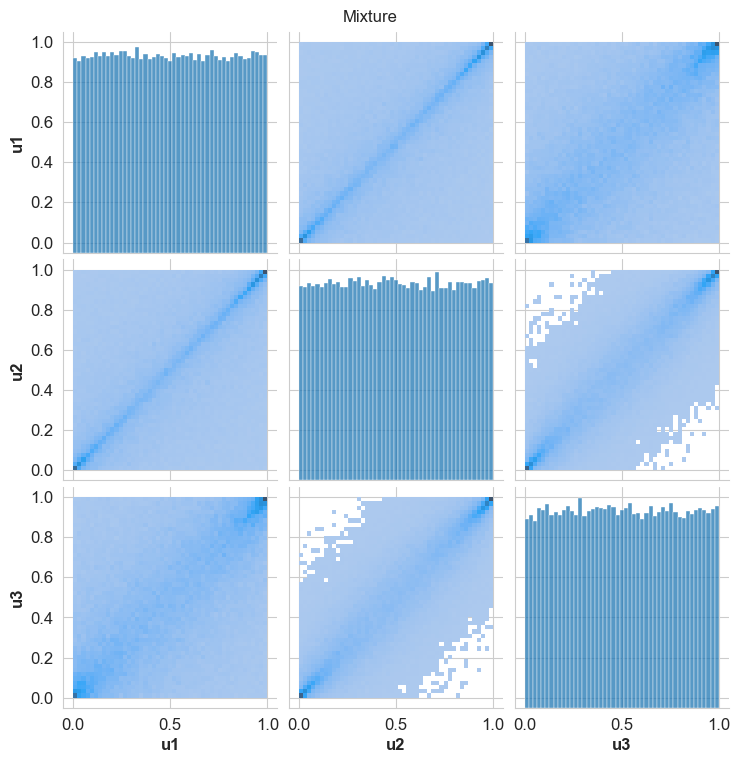

CPU times: user 3.56 s, sys: 435 ms, total: 4 s
Wall time: 2.74 s


array([[0.54529101, 0.43741729, 0.43112838],
       [0.228247  , 0.75274927, 0.73993458],
       [0.49085209, 0.20071639, 0.15269797],
       ...,
       [0.5338956 , 0.84307587, 0.7213442 ],
       [0.39814298, 0.32764107, 0.29018738],
       [0.78360574, 0.94997965, 0.96227708]])

In [12]:
%%time
u_n3 = d23b.sample_mixture_dvine_copula(taus=((0, 1), 0.7), n_copulas=1000, n_samples=int(1e5), plot=True)
u_n3

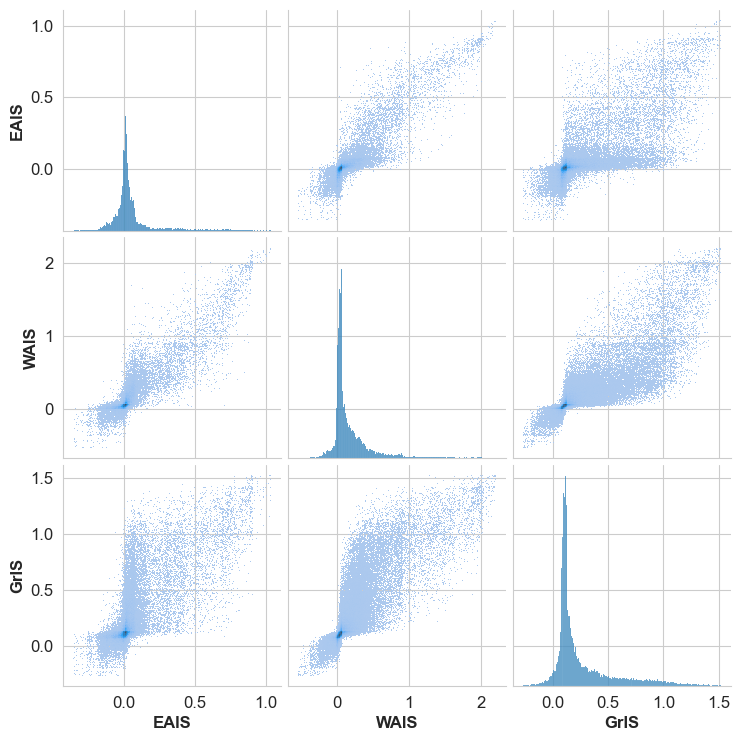

CPU times: user 4.94 s, sys: 403 ms, total: 5.34 s
Wall time: 4.06 s


array([[ 0.00737592,  0.04773898,  0.14508081],
       [ 0.01379217,  0.19459176,  0.13369146],
       [ 0.01884019,  0.06491259,  0.12007022],
       ...,
       [-0.05440947, -0.04929472,  0.07894079],
       [ 0.13866154,  0.37916464,  0.58942445],
       [-0.11332466,  0.02434184,  0.09851258]])

In [13]:
%%time
x_n3 = d23b.sample_trivariate_distribution(projection_source='fusion', scenario='SSP5-8.5', year=2100,
                                           families=(p21_l23_family, pv.BicopFamily.gaussian),
                                           rotations=(p21_l23_rotation, 0), taus=(p21_l23_tau, 0.7),
                                           n_samples=int(1e5), plot=True)
x_n3

## Figure illustrating bivariate distribution, bivariate copula, and truncated vine copula

CPU times: user 2min 24s, sys: 5.52 s, total: 2min 29s
Wall time: 2min 14s


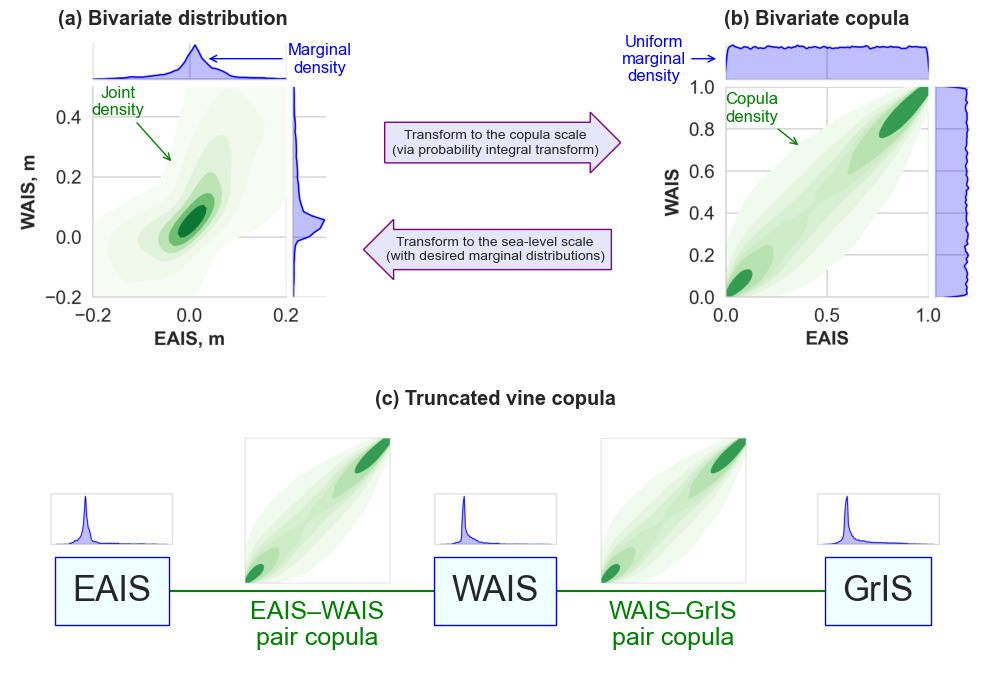

In [14]:
%%time
_ = d23b.fig_illustrate_bivariate_copula_vine(projection_source='fusion', scenario='SSP5-8.5', year=2100,
                                              family=p21_l23_family, rotation=p21_l23_rotation, tau=p21_l23_tau,
                                              n_samples=int(1e5))

## Figures showing total ice-sheet contribution

CPU times: user 30 s, sys: 282 ms, total: 30.3 s
Wall time: 30.4 s


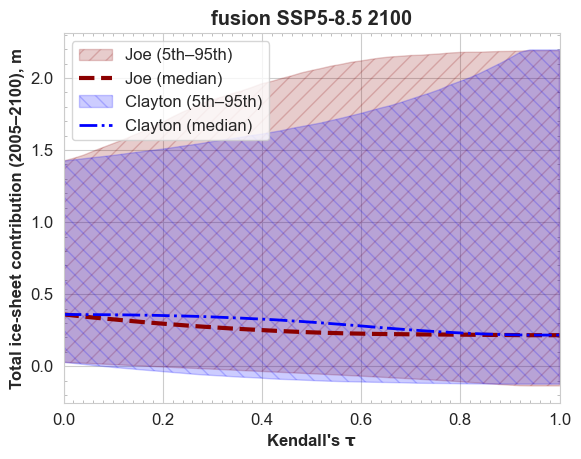

In [15]:
%%time
_ = d23b.ax_total_vs_tau(projection_source='fusion', scenario='SSP5-8.5', year=2100,
                         families=(pv.BicopFamily.joe, pv.BicopFamily.clayton),
                         rotations=(0, 0),
                         colors=('darkred', 'blue'),
                         n_samples=int(1e5), ax=None)

CPU times: user 1min 45s, sys: 671 ms, total: 1min 46s
Wall time: 1min 46s


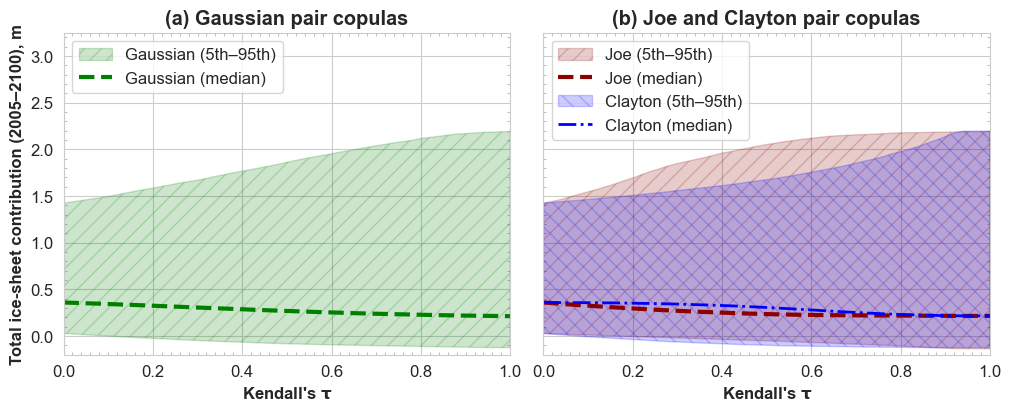

In [16]:
%%time
_ = d23b.fig_total_vs_tau(projection_source='fusion', scenario='SSP5-8.5', year=2100,
                          families_a=(pv.BicopFamily.gaussian, ), families_b=(pv.BicopFamily.joe, pv.BicopFamily.clayton),
                          colors_a=('green', ), colors_b=('darkred', 'blue'), ylim=(-0.2, 3.25),
                          n_samples=int(1e5))

read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2020): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2030): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2040): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2050): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2060): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2070): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2080): including PEN in WAIS.
read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2090): including PEN in WAIS.
CPU times: user 15.1 s, sys: 1.37 s, total: 16.5 s
Wall time: 16.2 s


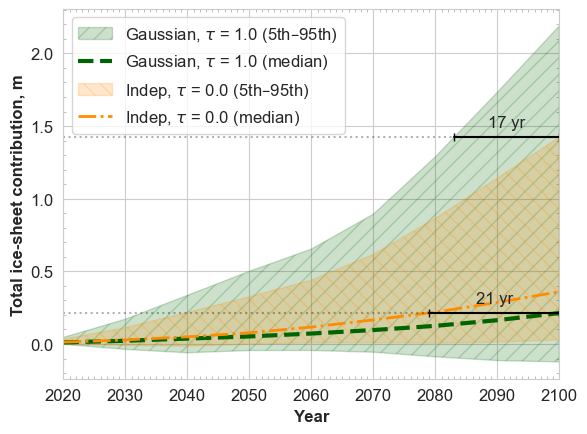

In [17]:
%%time
_ = d23b.ax_total_vs_time(projection_source='fusion', scenario='SSP5-8.5', years=np.arange(2020, 2101, 10),
                          families=(pv.BicopFamily.gaussian, pv.BicopFamily.indep), rotations=(0, 0), taus=(1.0, 0.0),
                          colors=('darkgreen', 'darkorange'), thresh_for_timing_diff=True, n_samples=int(1e5), ax=None)

CPU times: user 4.52 s, sys: 394 ms, total: 4.91 s
Wall time: 3.56 s


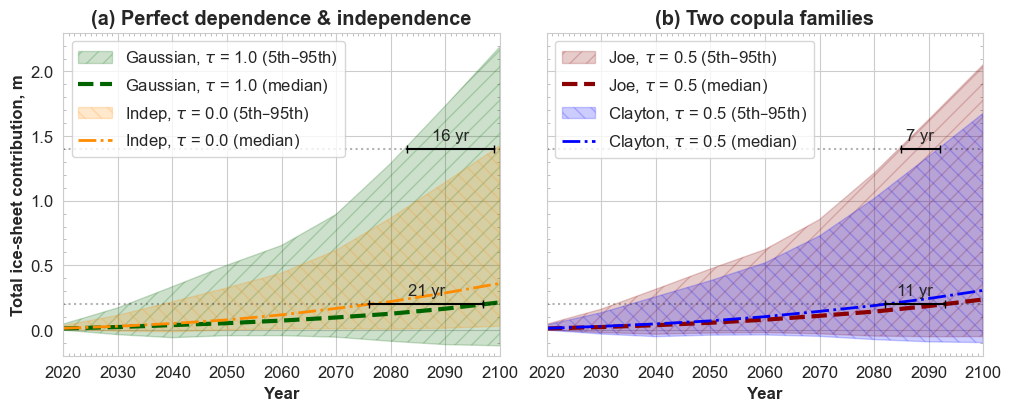

In [18]:
%%time
_ = d23b.fig_total_vs_time(projection_source='fusion', scenario='SSP5-8.5', years=np.arange(2020, 2101, 10),
                           families_a=(pv.BicopFamily.gaussian, pv.BicopFamily.indep), taus_a=(1.0, 0.0),
                           colors_a=('darkgreen', 'darkorange'), title_a='Perfect dependence & independence',
                           families_b=(pv.BicopFamily.joe, pv.BicopFamily.clayton), taus_b=(0.5, 0.5),
                           colors_b=('darkred', 'blue'), title_b='Two copula families',
                           thresh_for_timing_diff=(1.4, 0.2), ylim=(-0.2, 2.3), n_samples=int(1e5))

## Influence of GRD fingerprints

In [19]:
%%time
print(d23b.get_gauge_info(gauge='TANJONG_PAGAR'))
print(d23b.get_gauge_grd(gauge='TANJONG_PAGAR'))
# Table of GRD fingerprints
grd_df = pd.DataFrame(columns=['EAIS', 'WAIS', 'GrIS'])
for gauge in ['REYKJAVIK', 'DUBLIN', 'TANJONG_PAGAR']:
    gauge_grd = d23b.get_gauge_grd(gauge=gauge)
    grd_df.loc[gauge] = gauge_grd
grd_df.round(2)

{'gauge_name': 'TANJONG_PAGAR', 'gauge_id': 1746, 'lat': 1.27, 'lon': 103.85}
{'gauge_name': 'TANJONG_PAGAR', 'gauge_id': 1746, 'lat': 1.27, 'lon': 103.85, 'lat_grd': 1.2280701398849487, 'lon_grd': 103.85964965820312, 'EAIS': 1.1081630364060402, 'WAIS': 1.142452354542911, 'GIS': 1.1161844013258815, 'GrIS': 1.1161844013258815}
CPU times: user 880 ms, sys: 87.7 ms, total: 968 ms
Wall time: 1.02 s


,EAIS,WAIS,GrIS
REYKJAVIK,1.11,1.17,-1.70
DUBLIN,1.10,1.12,-0.04
TANJONG_PAGAR,1.11,1.14,1.12


CPU times: user 1.43 s, sys: 231 ms, total: 1.66 s
Wall time: 576 ms


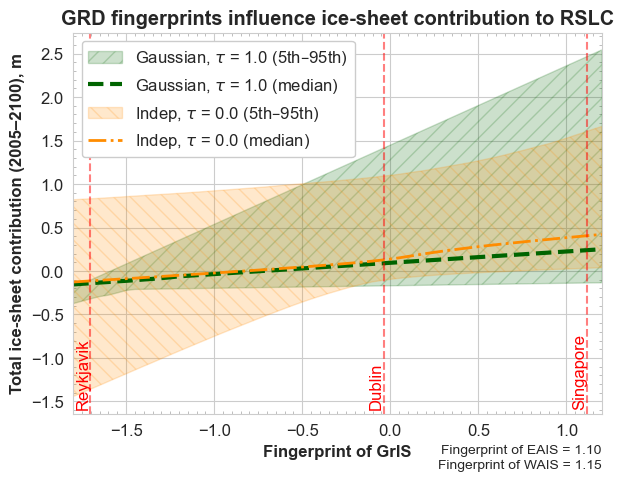

In [20]:
%%time
_ = d23b.ax_sum_vs_gris_fingerprint(projection_source='fusion', scenario='SSP5-8.5', year=2100,
                                    families=(pv.BicopFamily.gaussian, pv.BicopFamily.indep),
                                    rotations=(0, 0), taus=(1.0, 0.0), colors=('darkgreen', 'darkorange'),
                                    n_samples=int(1e5), ax=None)

## Name and save a figure

In [21]:
fig, ax = plt.subplots(1, 1)  # empty figure
_ = d23b.name_save_fig(fig=fig, feso='o', exts=('pdf', 'png'), fig_dir=Path('temp'), close=True)

Written o01.pdf (0.01 MB)
Written o01.png (0.03 MB)


In [22]:
! date

Fri May 12 13:54:45 +08 2023
